# Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1. Problem Statement

# 2. Data Gathering

In [2]:
df = pd.read_csv('autos.csv')
df

,symbol,loss,make,fuel,aspir,doors,style,drive,eng_loc,wb,...,eng_cc,fuel.sys,bore,stroke,comp.ratio,hp,rpm,city_mpg,hw_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symbol,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
loss,NaN,NaN,NaN,164.0,164.0,NaN,158.0,NaN,158.0,NaN,...,74.0,103.0,74.0,103.0,74.0,95.0,95.0,95.0,95.0,95.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspir,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
eng_loc,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wb,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   make        205 non-null    object 
 3   fuel        205 non-null    object 
 4   aspir       205 non-null    object 
 5   doors       203 non-null    object 
 6   style       205 non-null    object 
 7   drive       205 non-null    object 
 8   eng_loc     205 non-null    object 
 9   wb          205 non-null    float64
 10  length      205 non-null    float64
 11  width       205 non-null    float64
 12  height      205 non-null    float64
 13  weight      205 non-null    int64  
 14  eng_type    205 non-null    object 
 15  cylinders   205 non-null    object 
 16  eng_cc      205 non-null    int64  
 17  fuel.sys    205 non-null    object 
 18  bore        201 non-null    float64
 19  stroke      201 non-null    f

In [6]:
df['cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylinders, dtype: int64

In [7]:
df['cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

# Encoding

# 1.Label Encoding

In [8]:
List1 = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
np.sort(List1)

array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype='<U6')

In [9]:
List1 = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
sorted(List1)

['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']

In [10]:
Test = ['Low','Medium','Medium','High','High','Low']
sorted(Test)

['High', 'High', 'Low', 'Low', 'Medium', 'Medium']

In [11]:
df_test = pd.DataFrame({'Test':['Low','Medium','Medium','High','High','Low']})

In [12]:
labelEnc = LabelEncoder()
labelEnc.fit_transform(df_test['Test'])

array([1, 2, 2, 0, 0, 1])

In [13]:
df['cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [14]:
df['cylinders'].replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},
                        inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   make        205 non-null    object 
 3   fuel        205 non-null    object 
 4   aspir       205 non-null    object 
 5   doors       203 non-null    object 
 6   style       205 non-null    object 
 7   drive       205 non-null    object 
 8   eng_loc     205 non-null    object 
 9   wb          205 non-null    float64
 10  length      205 non-null    float64
 11  width       205 non-null    float64
 12  height      205 non-null    float64
 13  weight      205 non-null    int64  
 14  eng_type    205 non-null    object 
 15  cylinders   205 non-null    int64  
 16  eng_cc      205 non-null    int64  
 17  fuel.sys    205 non-null    object 
 18  bore        201 non-null    float64
 19  stroke      201 non-null    f

In [16]:
labelEnc = LabelEncoder()
labelEnc.fit_transform(df['cylinders'])

array([2, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 6, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2], dtype=int64)

# OneHot Encoding

In [17]:
Test = ['Low','Medium','Medium','High','High','Low']

In [18]:
df_test = pd.DataFrame({'Test':['Low','Medium','Medium','High','High','Low']})

df_new = pd.get_dummies(df_test, columns = ['Test'])
df_new

,Test_High,Test_Low,Test_Medium
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
5,0,1,0


In [19]:
df_test = pd.DataFrame({'Test':['Low','Medium','Medium','High','High','Low']})

df_new = pd.get_dummies(df_test, columns = ['Test'], drop_first=True, prefix = 'test')
df_new

,test_Low,test_Medium
0,1,0
1,0,1
2,0,1
3,0,0
4,0,0
5,1,0


In [20]:
df_test

,Test
0,Low
1,Medium
2,Medium
3,High
4,High
5,Low


In [21]:
df_new

,test_Low,test_Medium
0,1,0
1,0,1
2,0,1
3,0,0
4,0,0
5,1,0


In [22]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symbol,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
loss,NaN,NaN,NaN,164.0,164.0,NaN,158.0,NaN,158.0,NaN,...,74.0,103.0,74.0,103.0,74.0,95.0,95.0,95.0,95.0,95.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspir,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
eng_loc,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wb,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   make        205 non-null    object 
 3   fuel        205 non-null    object 
 4   aspir       205 non-null    object 
 5   doors       203 non-null    object 
 6   style       205 non-null    object 
 7   drive       205 non-null    object 
 8   eng_loc     205 non-null    object 
 9   wb          205 non-null    float64
 10  length      205 non-null    float64
 11  width       205 non-null    float64
 12  height      205 non-null    float64
 13  weight      205 non-null    int64  
 14  eng_type    205 non-null    object 
 15  cylinders   205 non-null    int64  
 16  eng_cc      205 non-null    int64  
 17  fuel.sys    205 non-null    object 
 18  bore        201 non-null    float64
 19  stroke      201 non-null    f

In [24]:
df.head().T

,0,1,2,3,4
symbol,3,3,1,2,2
loss,NaN,NaN,NaN,164.0,164.0
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel,gas,gas,gas,gas,gas
aspir,std,std,std,std,std
doors,two,two,two,four,four
style,convertible,convertible,hatchback,sedan,sedan
drive,rwd,rwd,rwd,fwd,4wd
eng_loc,front,front,front,front,front
wb,88.6,88.6,94.5,99.8,99.4


In [26]:
df.drop(['make','fuel','aspir','doors','style','drive','eng_loc','eng_type','fuel.sys'
        ],axis = 1, inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   loss        164 non-null    float64
 2   wb          205 non-null    float64
 3   length      205 non-null    float64
 4   width       205 non-null    float64
 5   height      205 non-null    float64
 6   weight      205 non-null    int64  
 7   cylinders   205 non-null    int64  
 8   eng_cc      205 non-null    int64  
 9   bore        201 non-null    float64
 10  stroke      201 non-null    float64
 11  comp.ratio  205 non-null    float64
 12  hp          203 non-null    float64
 13  rpm         203 non-null    float64
 14  city_mpg    205 non-null    int64  
 15  hw_mpg      205 non-null    int64  
 16  price       201 non-null    float64
dtypes: float64(11), int64(6)
memory usage: 27.4 KB


In [28]:
df.isna().sum()

symbol         0
loss          41
wb             0
length         0
width          0
height         0
weight         0
cylinders      0
eng_cc         0
bore           4
stroke         4
comp.ratio     0
hp             2
rpm            2
city_mpg       0
hw_mpg         0
price          4
dtype: int64

In [29]:
df.drop(['loss'], axis = 1, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      205 non-null    int64  
 1   wb          205 non-null    float64
 2   length      205 non-null    float64
 3   width       205 non-null    float64
 4   height      205 non-null    float64
 5   weight      205 non-null    int64  
 6   cylinders   205 non-null    int64  
 7   eng_cc      205 non-null    int64  
 8   bore        201 non-null    float64
 9   stroke      201 non-null    float64
 10  comp.ratio  205 non-null    float64
 11  hp          203 non-null    float64
 12  rpm         203 non-null    float64
 13  city_mpg    205 non-null    int64  
 14  hw_mpg      205 non-null    int64  
 15  price       201 non-null    float64
dtypes: float64(10), int64(6)
memory usage: 25.8 KB


In [31]:
df.isna().sum()

symbol        0
wb            0
length        0
width         0
height        0
weight        0
cylinders     0
eng_cc        0
bore          4
stroke        4
comp.ratio    0
hp            2
rpm           2
city_mpg      0
hw_mpg        0
price         4
dtype: int64

In [32]:
df.corr()

,symbol,wb,length,width,height,weight,cylinders,eng_cc,bore,stroke,comp.ratio,hp,rpm,city_mpg,hw_mpg,price
symbol,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
wb,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
cylinders,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.243553,0.008578,-0.020002,0.691633,-0.124434,-0.445837,-0.466666,0.708645
eng_cc,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,0.490378,0.607480,0.559204,0.176195,0.649045,0.243553,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.161477,0.129739,0.182956,-0.056999,0.168929,0.008578,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


<AxesSubplot:>

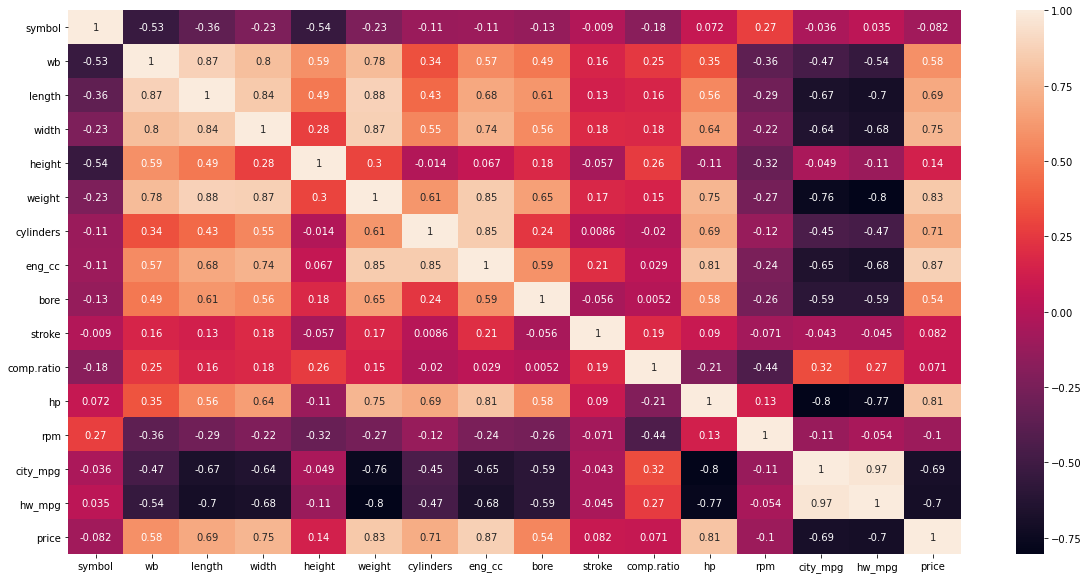

In [34]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

In [35]:
df.drop(['symbol','height','stroke','comp.ratio','rpm'], axis = 1, inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wb         205 non-null    float64
 1   length     205 non-null    float64
 2   width      205 non-null    float64
 3   weight     205 non-null    int64  
 4   cylinders  205 non-null    int64  
 5   eng_cc     205 non-null    int64  
 6   bore       201 non-null    float64
 7   hp         203 non-null    float64
 8   city_mpg   205 non-null    int64  
 9   hw_mpg     205 non-null    int64  
 10  price      201 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.7 KB


In [37]:
df.isna().sum()

wb           0
length       0
width        0
weight       0
cylinders    0
eng_cc       0
bore         4
hp           2
city_mpg     0
hw_mpg       0
price        4
dtype: int64

In [38]:
df['bore'] = df['bore'].fillna(df['bore'].median())
df['hp'] = df['hp'].fillna(df['hp'].median())
df['price'] = df['price'].fillna(df['price'].median())

In [39]:
df.isna().sum()

wb           0
length       0
width        0
weight       0
cylinders    0
eng_cc       0
bore         0
hp           0
city_mpg     0
hw_mpg       0
price        0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wb         205 non-null    float64
 1   length     205 non-null    float64
 2   width      205 non-null    float64
 3   weight     205 non-null    int64  
 4   cylinders  205 non-null    int64  
 5   eng_cc     205 non-null    int64  
 6   bore       205 non-null    float64
 7   hp         205 non-null    float64
 8   city_mpg   205 non-null    int64  
 9   hw_mpg     205 non-null    int64  
 10  price      205 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 17.7 KB


# Train Test And Split

In [41]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [42]:
x

,wb,length,width,weight,cylinders,eng_cc,bore,hp,city_mpg,hw_mpg
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27
1,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27
2,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26
3,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30
4,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,4,141,3.78,114.0,23,28
201,109.1,188.8,68.8,3049,4,141,3.78,160.0,19,25
202,109.1,188.8,68.9,3012,6,173,3.58,134.0,18,23
203,109.1,188.8,68.9,3217,6,145,3.01,106.0,26,27


In [43]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [46]:
x_train.shape

(164, 10)

In [48]:
y_train.shape

(164,)

In [50]:
x_test.shape

(41, 10)

# Model Training / Building

In [51]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

# Evaluation

In [52]:
y_pred = linear_model.predict(x_test)
y_pred

array([ 6712.93734248,  6667.90670728,  6130.19108513,  5132.16175868,
        9418.09314937, 24221.82343527,  6784.62860871,  -856.59142954,
        6093.41390036, 12170.23910643, 15992.83557123, 16348.03977409,
       15872.2336163 , 10459.52989627, 19239.17387115, 15912.5979065 ,
       10259.16808776,  7576.70757353, 13500.19147042,  9697.64227996,
       12257.86261909,  6687.15950821,  9542.2778796 ,  8934.92793851,
       15724.29872051,  7600.24497177, 19442.81018791,  6578.61585105,
        6113.88798511,  7460.61941301,  7457.57859649, 12262.79715051,
       26402.32545941, 13843.42270225, 17822.4435052 ,  6574.20258888,
        9027.60644412, 36313.05378367, 10445.92426312, 16949.01001014,
        5342.31187649])

In [53]:
y_test

78      6669.0
97      7999.0
151     6338.0
44     10295.0
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
Name: price, dtype: float64

In [54]:
y_test - y_pred

78       -43.937342
97      1331.093293
151      207.808915
44      5162.838241
40       876.906851
67      1330.176565
98      1464.371391
18      6007.591430
152      394.586100
62     -1925.239106
4       1457.164429
172     1320.960226
197      642.766384
38     -1364.529896
29     -6275.173871
170    -4713.597906
190     -279.168088
33     -1047.707574
136     4649.808530
145     1561.357720
173    -3309.862619
31       167.840492
11      7382.722120
119     -977.927939
169    -5735.298721
34      -471.244972
84     -4953.810188
184     1416.384149
120      115.112015
35      -165.619413
163      600.421404
28     -3341.797151
16     14912.674541
130    -4548.422702
116      127.556495
182     1200.797411
27      -469.606444
47     -4063.053784
58      5199.075737
204     5675.989990
138     -224.311876
Name: price, dtype: float64

In [55]:
df_residual = pd.DataFrame()
df_residual['Residuals'] = y_test - y_pred

<AxesSubplot:xlabel='Residuals', ylabel='Density'>

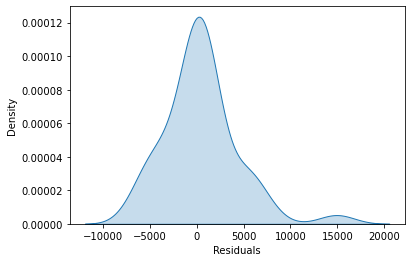

In [58]:
sns.kdeplot(df_residual['Residuals'], fill = True)

In [59]:
mse = mean_squared_error(y_test,y_pred)
mse

15227248.220914863

In [60]:
rmse = np.sqrt(mse)
rmse

3902.210683819476

In [61]:
mean_absolute_error(y_test,y_pred)

2612.5930248168706

In [62]:
r2_score(y_test,y_pred)

0.7220214597301231

In [63]:
M_Values = linear_model.coef_
M_Values

array([ 1.42917226e+01, -1.93344105e+01,  3.74368577e+02,  1.47108739e+00,
       -1.50899387e+03,  1.59998989e+02, -3.44612668e+03,  1.03392796e+01,
        3.89306748e+01, -1.78993724e+02])

In [64]:
x.columns

Index(['wb', 'length', 'width', 'weight', 'cylinders', 'eng_cc', 'bore', 'hp',
       'city_mpg', 'hw_mpg'],
      dtype='object')

In [65]:
for i, feature_name in enumerate(x.columns):
    print(f'Slope of attributes or values for {feature_name} is {M_Values[i]}')

Slope of attributes or values for wb is 14.291722620772173
Slope of attributes or values for length is -19.33441053661791
Slope of attributes or values for width is 374.36857669382863
Slope of attributes or values for weight is 1.4710873905268311
Slope of attributes or values for cylinders is -1508.9938723049436
Slope of attributes or values for eng_cc is 159.99898895395182
Slope of attributes or values for bore is -3446.126684756809
Slope of attributes or values for hp is 10.339279628410084
Slope of attributes or values for city_mpg is 38.93067475013451
Slope of attributes or values for hw_mpg is -178.99372360842125


In [66]:
for i, feature_name in enumerate(x.columns):
    print(f'Slope of attributes or values for {feature_name} is {round(M_Values[i],4)}')

Slope of attributes or values for wb is 14.2917
Slope of attributes or values for length is -19.3344
Slope of attributes or values for width is 374.3686
Slope of attributes or values for weight is 1.4711
Slope of attributes or values for cylinders is -1508.9939
Slope of attributes or values for eng_cc is 159.999
Slope of attributes or values for bore is -3446.1267
Slope of attributes or values for hp is 10.3393
Slope of attributes or values for city_mpg is 38.9307
Slope of attributes or values for hw_mpg is -178.9937


In [67]:
linear_model.intercept_

-12199.38543505359